# Flux: NEE (2005-2024)

**Author**: Lukas Hörtnagl (holukas@ethz.ch)

# Imports

In [1]:
import importlib.metadata
import warnings
from datetime import datetime
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

import diive as dv
from diive.core.io.files import save_parquet, load_parquet
from diive.core.plotting.cumulative import CumulativeYear

warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.87.0


# Load data

In [2]:
SOURCEDIR = r"../80_FINALIZE"
FILENAME = r"81.1_FLUXES_M15_MGMT_L4.2_NEE_GPP_RECO_LE_H_FN2O_FCH4.parquet"
FILEPATH = Path(SOURCEDIR) / FILENAME
df = load_parquet(filepath=FILEPATH)
df

Loaded .parquet file ..\80_FINALIZE\81.1_FLUXES_M15_MGMT_L4.2_NEE_GPP_RECO_LE_H_FN2O_FCH4.parquet (7.102 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


.PREC_RAIN_TOT_GF1_0.5_1_MEAN3H-12  .PREC_RAIN_TOT_GF1_0.5_1_MEAN3H-18  .PREC_RAIN_TOT_GF1_0.5_1_MEAN3H-24  .PREC_RAIN_TOT_GF1_0.5_1_MEAN3H-6  .SWC_GF1_0.15_1_gfXG_MEAN3H-12  .SWC_GF1_0.15_1_gfXG_MEAN3H-18  .SWC_GF1_0.15_1_gfXG_MEAN3H-24  .SWC_GF1_0.15_1_gfXG_MEAN3H-6  .TS_GF1_0.04_1_gfXG_MEAN3H-12  .TS_GF1_0.04_1_gfXG_MEAN3H-18  .TS_GF1_0.04_1_gfXG_MEAN3H-24  .TS_GF1_0.04_1_gfXG_MEAN3H-6  .TS_GF1_0.15_1_gfXG_MEAN3H-12  .TS_GF1_0.15_1_gfXG_MEAN3H-18  .TS_GF1_0.15_1_gfXG_MEAN3H-24  ...  GPP_NT_CUT_50_gfRF  RECO_DT_CUT_50_gfRF  GPP_DT_CUT_50_gfRF  RECO_DT_CUT_50_gfRF_SD  GPP_DT_CUT_50_gfRF_SD  G_GF1_0.03_1  G_GF1_0.03_2  G_GF1_0.05_1  G_GF1_0.05_2  G_GF4_0.02_1  G_GF5_0.02_1  LW_OUT_T1_2_1  NETRAD_T1_2_1  PPFD_OUT_T1_2_2  SW_OUT_T1_2_1
TIMESTAMP_MIDDLE                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           ...                                                                                                                                                                                                                                                              
2005-01-01 00:15:00                                 NaN                                 NaN                                 NaN                                NaN                             NaN                             NaN                             NaN                            NaN                            NaN                            NaN                            NaN                           NaN                            NaN                            NaN                            NaN  ...            0.918553             0.093071                 0.0                0.080016                    0.0           NaN           NaN           NaN           NaN           NaN           NaN            NaN            NaN              NaN            NaN
2005-01-01 00:45:00                                 NaN                                 NaN                                 NaN                                NaN                             NaN                             NaN                             NaN                            NaN                            NaN                            NaN                            NaN                           NaN                            NaN                            NaN                            NaN  ...            0.917972             0.092682                 0.0                0.079688                    0.0           NaN           NaN           NaN           NaN           NaN           NaN            NaN            NaN              NaN            NaN
2005-01-01 01:15:00                                 NaN                                 NaN                                 NaN                                NaN                             NaN                             NaN                             NaN                            NaN                            NaN                            NaN                            NaN                           NaN                            NaN                            NaN                            NaN  ...            0.163001             0.093071                 0.0                0.080016                    0.0           NaN           NaN           NaN           NaN           NaN           NaN            NaN            NaN              NaN            NaN
2005-01-01 01:45:00                                 NaN                                 NaN                                 NaN                                NaN                             NaN  

In [3]:
series = df['NEE_L3.1_L3.3_CUT_50_QCF_gfRF'].copy()
series

TIMESTAMP_MIDDLE
2005-01-01 00:15:00    0.911990
2005-01-01 00:45:00    0.910926
2005-01-01 01:15:00    1.667542
2005-01-01 01:45:00    1.639653
2005-01-01 02:15:00    1.660211
                         ...   
2024-12-31 21:45:00    1.160720
2024-12-31 22:15:00    1.131454
2024-12-31 22:45:00    1.046967
2024-12-31 23:15:00    1.372674
2024-12-31 23:45:00    1.126110
Freq: 30min, Name: NEE_L3.1_L3.3_CUT_50_QCF_gfRF, Length: 350640, dtype: float64

In [4]:
var = "NEE"
units = r"$\mathrm{\mu mol\ CO_{2}\ m^{-2}\ s^{-1}}$"
xlabel = f"{var} ({units})"
xlim = [-20, 20]

# Ridgeline plots

## Yearly

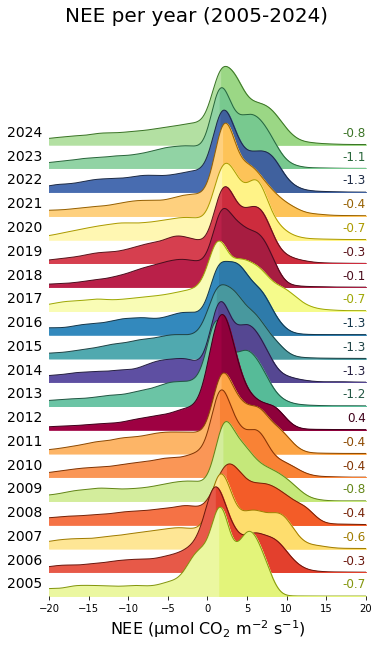

In [5]:
rp = dv.ridgeline(series=series)
rp.plot(
    how='yearly',
    kd_kwargs=None,  # params from scikit KernelDensity as dict
    xlim=xlim,  # min/max as list
    ylim=[0, 0.14],  # min/max as list
    hspace=-0.8,  # overlap between months
    xlabel=f"{var} ({units})",
    fig_width=5,
    fig_height=9,
    shade_percentile=0.5,
    show_mean_line=False,
    fig_title=f"{var} per year (2005-2024)",
    fig_dpi=72,
    showplot=True,
    ascending=False
)

## Monthly

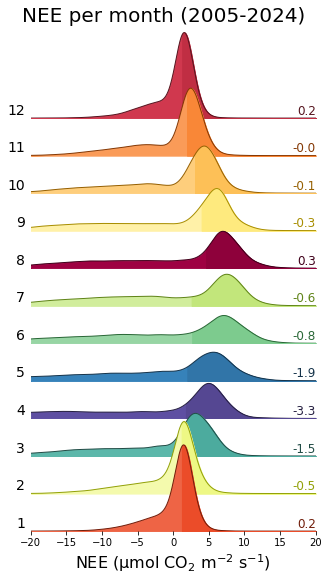

In [6]:
rp.plot(
    how='monthly',
    kd_kwargs=None,  # params from scikit KernelDensity as dict
    xlim=xlim,  # min/max as list
    ylim=[0, 0.25],  # min/max as list
    hspace=-0.6,  # overlap between months
    xlabel=f"{var} ({units})",
    fig_width=4.5,
    fig_height=8,
    shade_percentile=0.5,
    show_mean_line=False,
    fig_title=f"{var} per month (2005-2024)",
    fig_dpi=72,
    showplot=True,
    ascending=False
)

## Weekly

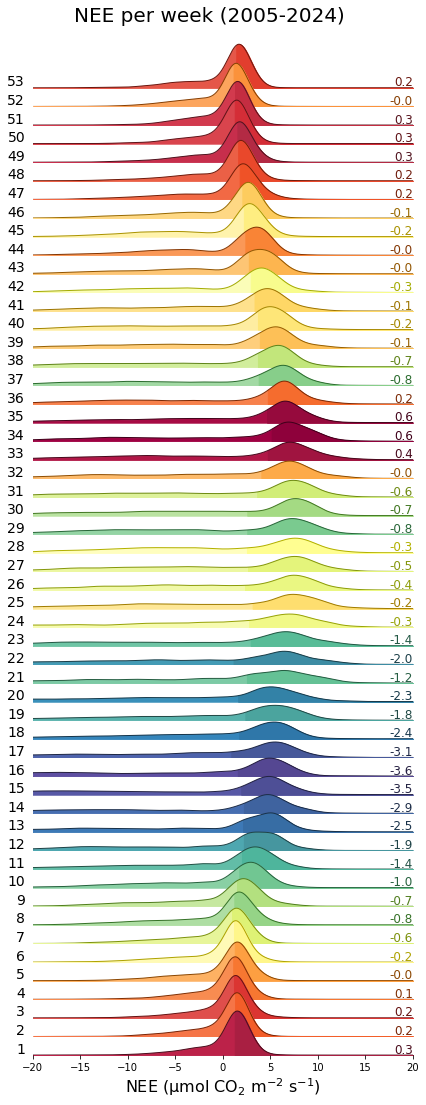

In [7]:
rp.plot(
    how='weekly',
    kd_kwargs=None,  # params from scikit KernelDensity as dict
    xlim=xlim,  # min/max as list
    ylim=[0, 0.25],  # min/max as list
    hspace=-0.6,  # overlap
    xlabel=f"{var} ({units})",
    fig_width=6,
    fig_height=16,
    shade_percentile=0.5,
    show_mean_line=False,
    fig_title=f"{var} per week (2005-2024)",
    fig_dpi=72,
    showplot=True,
    ascending=False
)

## Single years per month

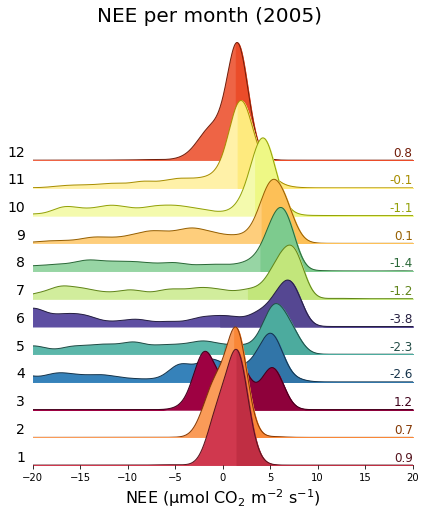

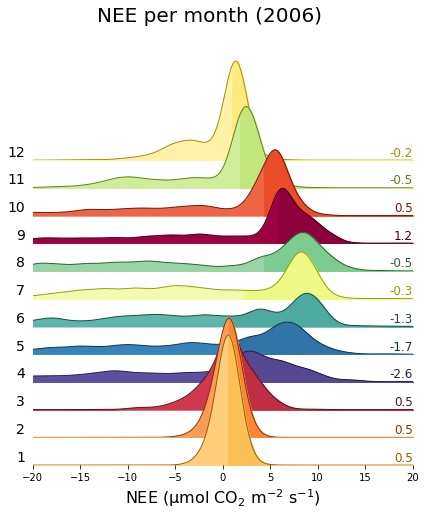

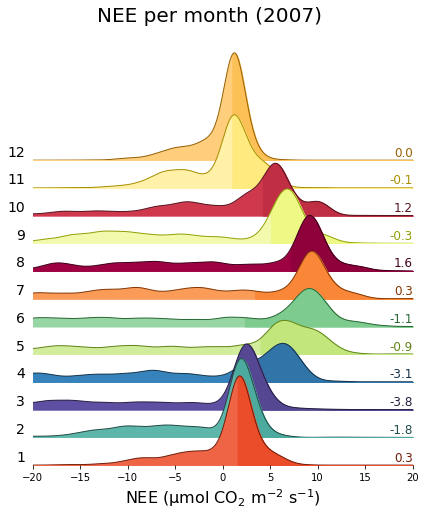

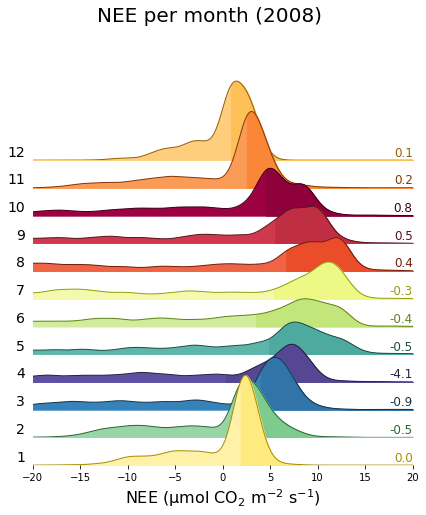

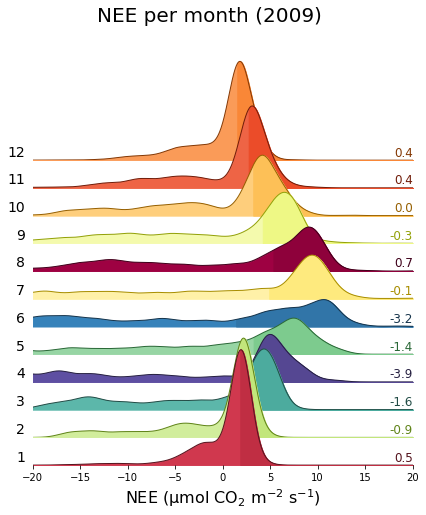

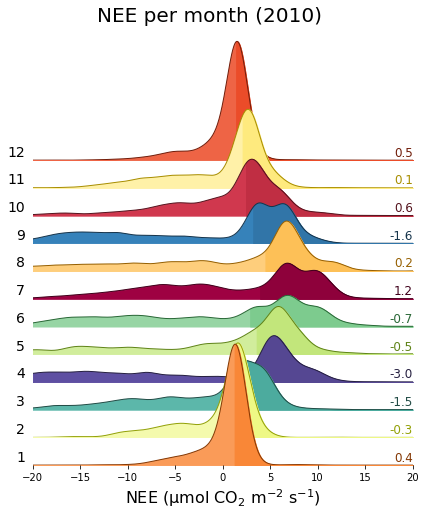

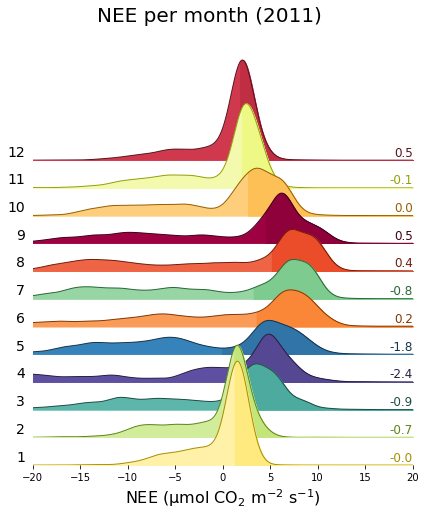

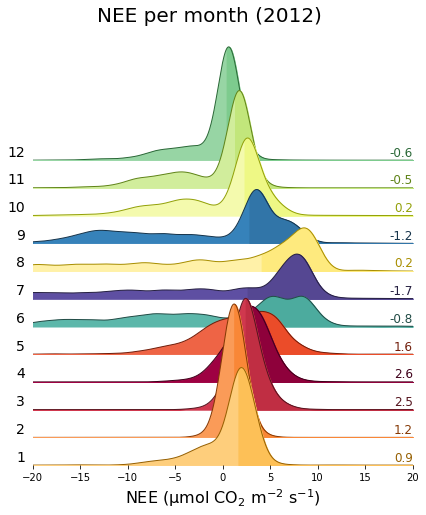

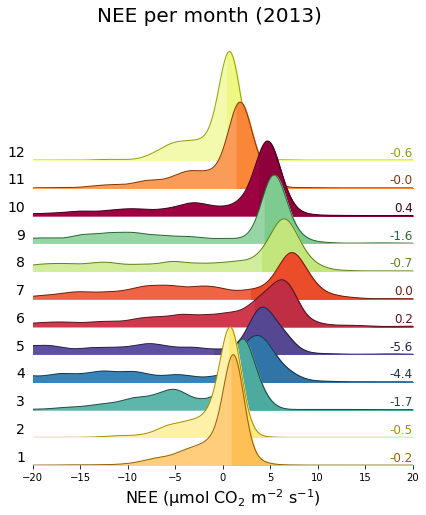

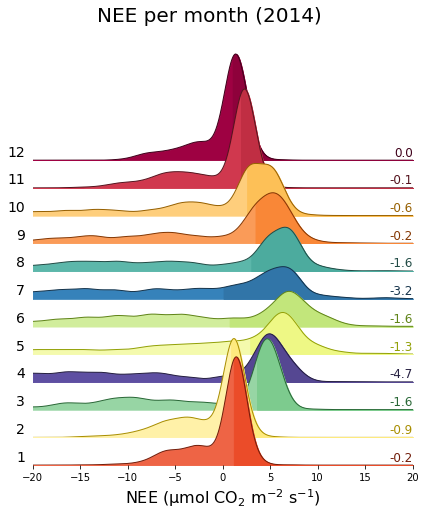

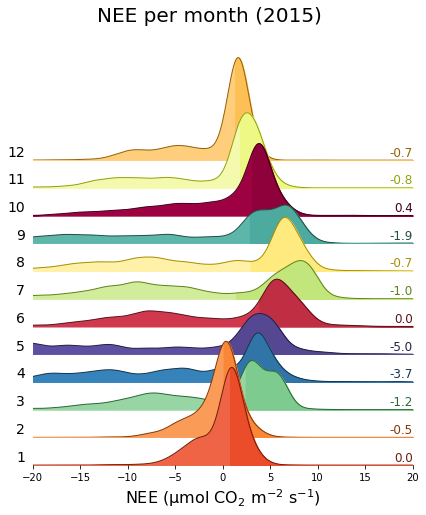

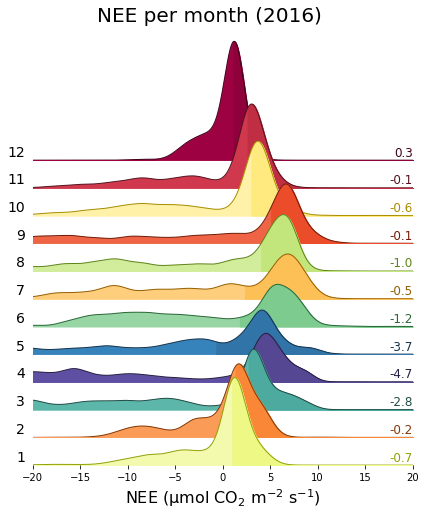

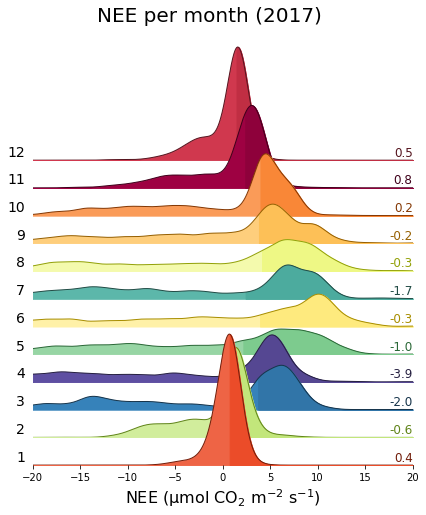

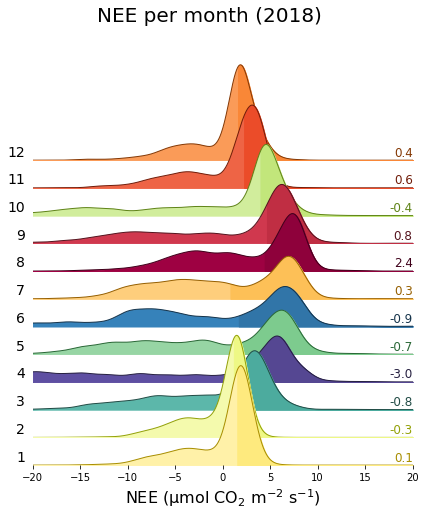

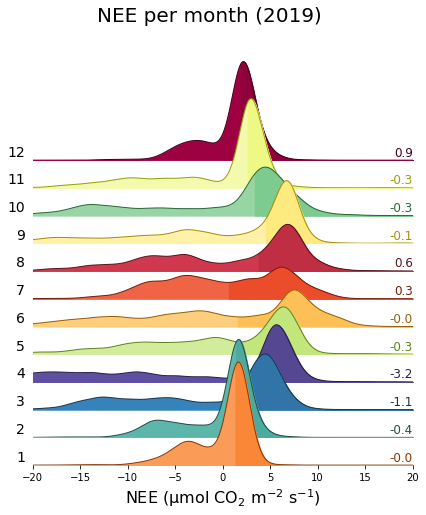

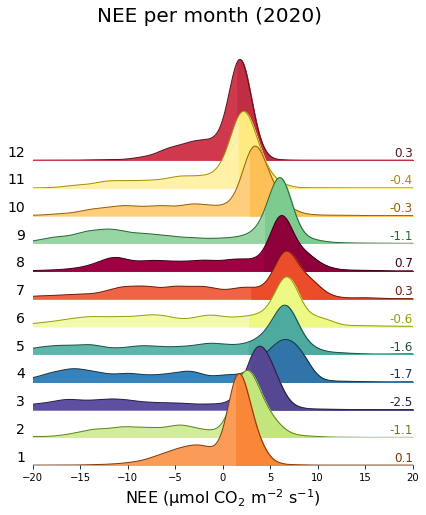

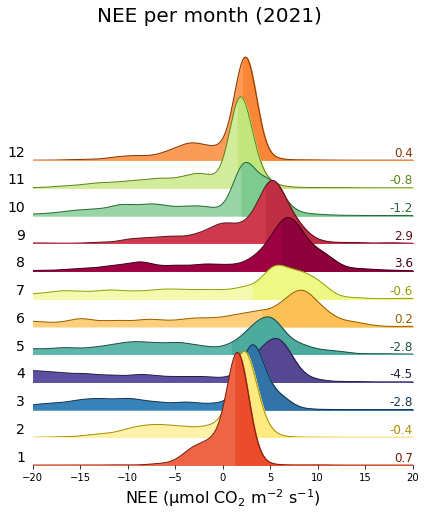

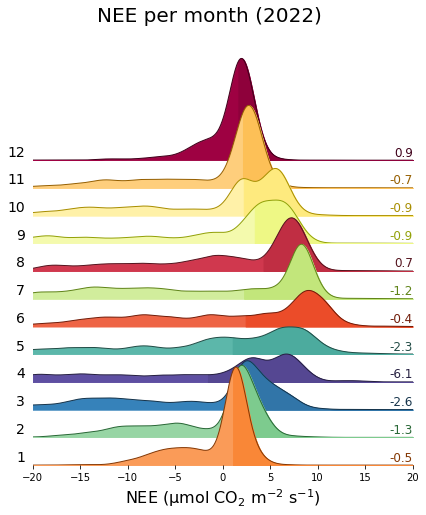

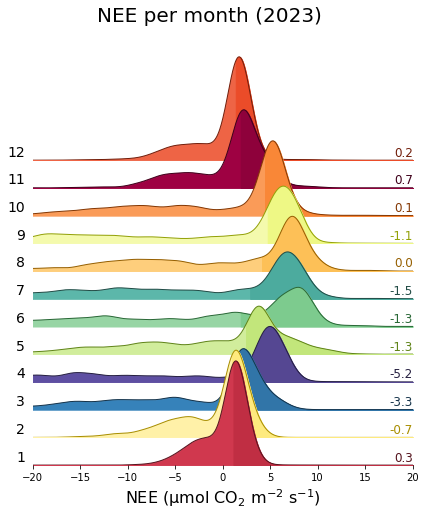

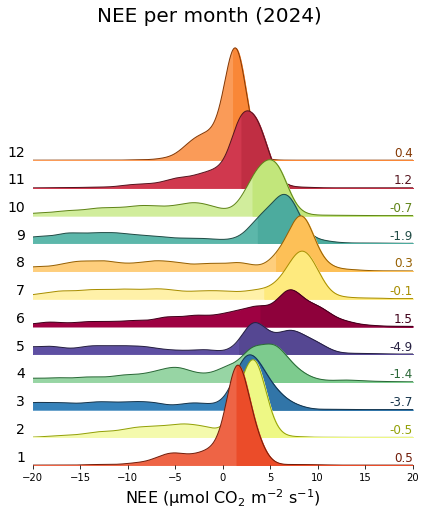

In [8]:
uniq_years = series.index.year.unique()
for uy in uniq_years:
    series_yr = series.loc[series.index.year == uy].copy()
    rp = dv.ridgeline(series=series_yr)
    rp.plot(
        how='monthly',
        kd_kwargs=None,  # params from scikit KernelDensity as dict
        xlim=xlim,  # min/max as list
        ylim=[0, 0.32],  # min/max as list
        hspace=-0.8,  # overlap
        xlabel=f"{var} ({units})",
        fig_width=6,
        fig_height=7,
        shade_percentile=0.5,
        show_mean_line=False,
        fig_title=f"{var} per month ({uy})",
        fig_dpi=72,
        showplot=True,
        ascending=False
    )

## Single years per week

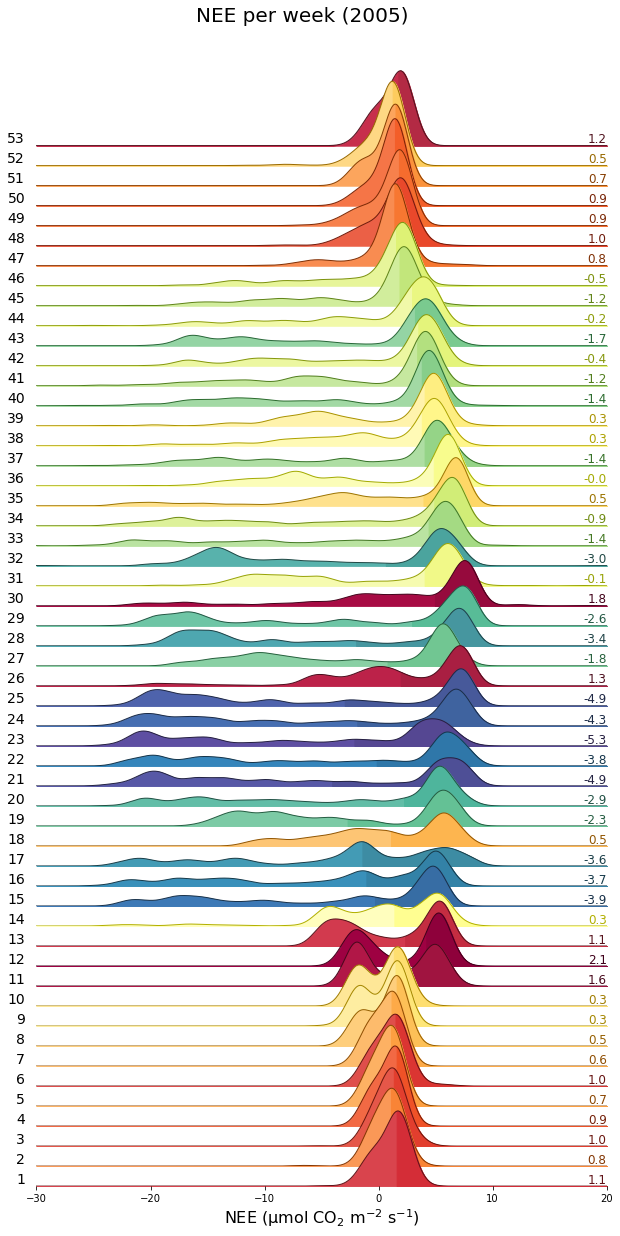

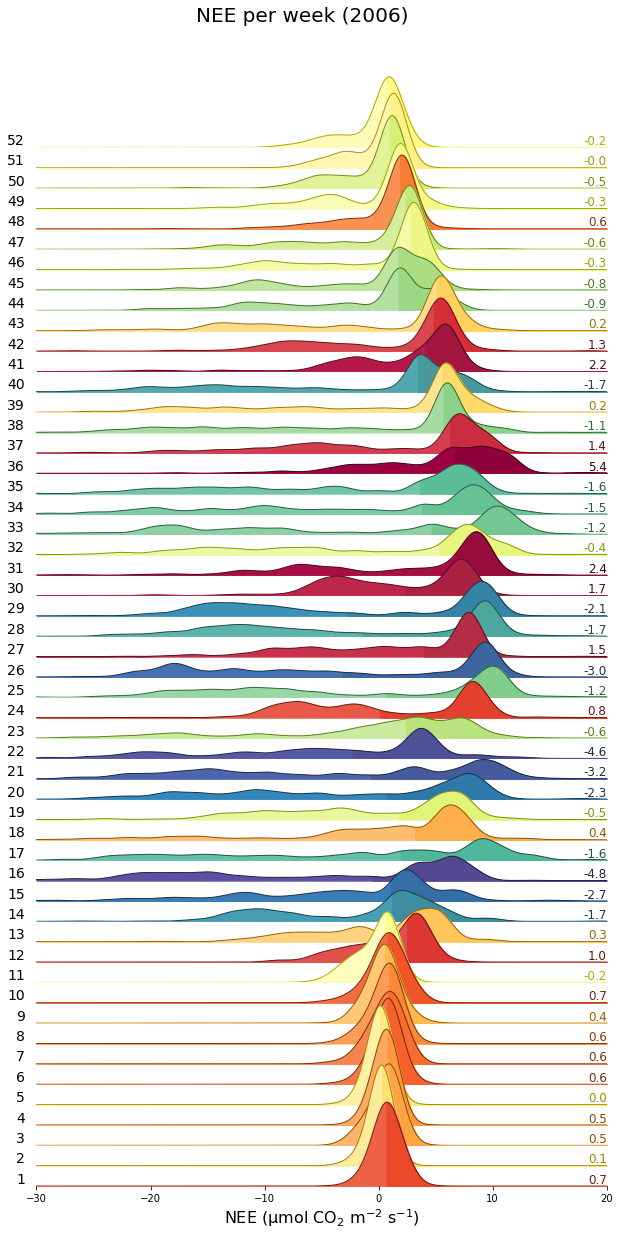

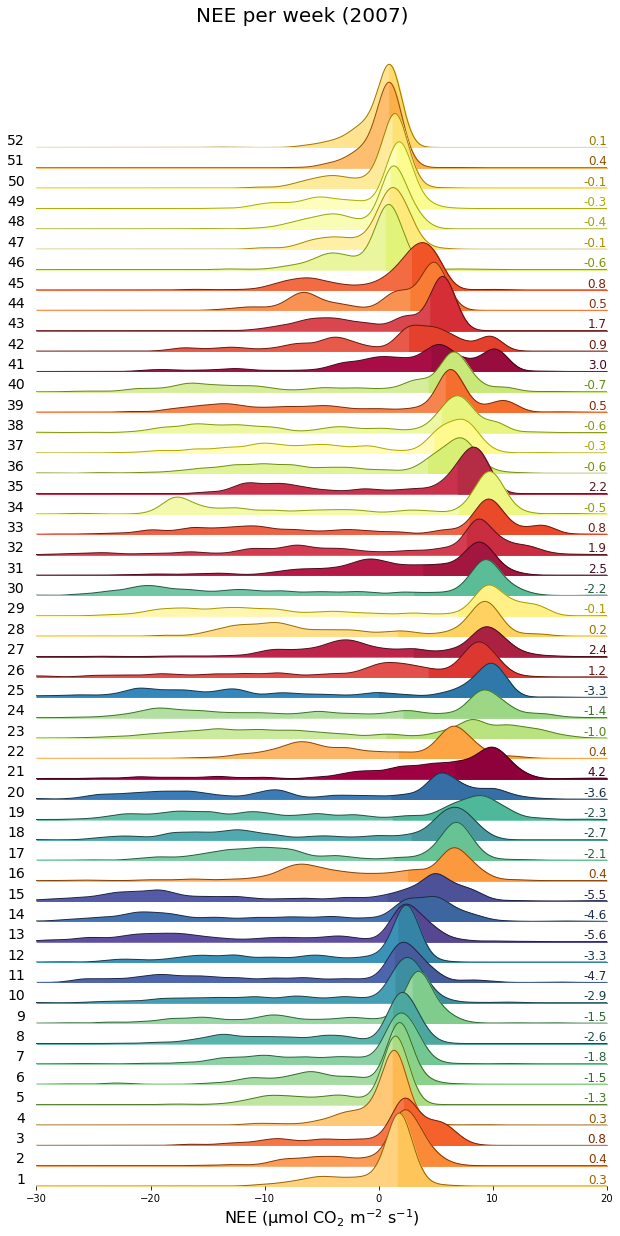

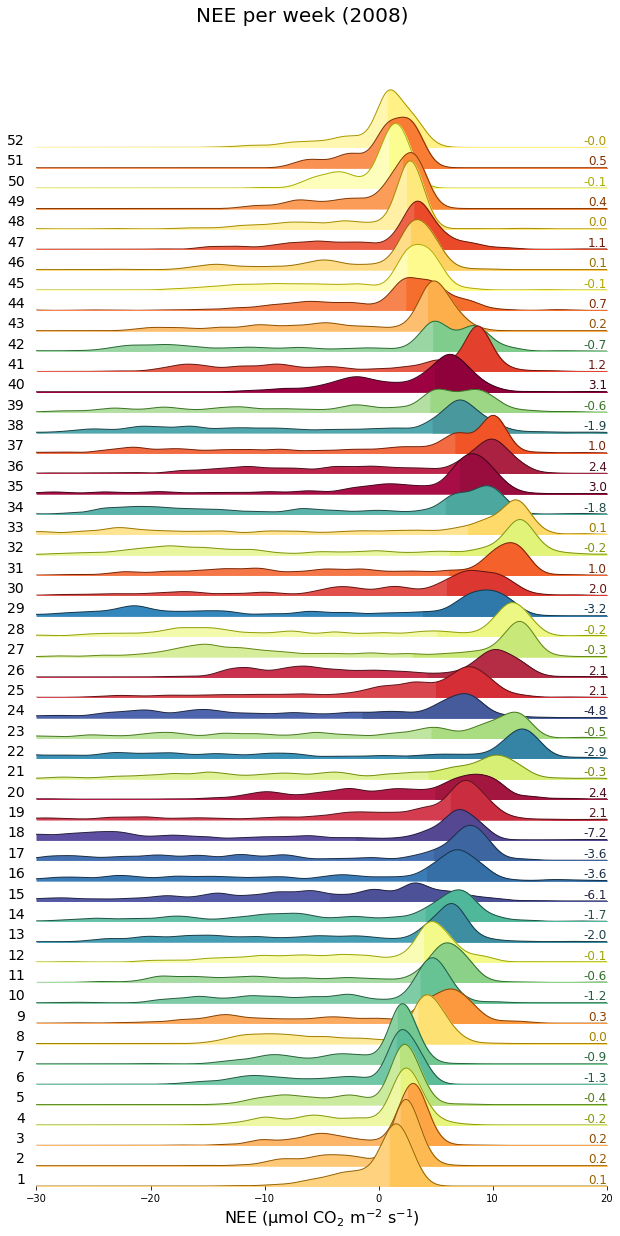

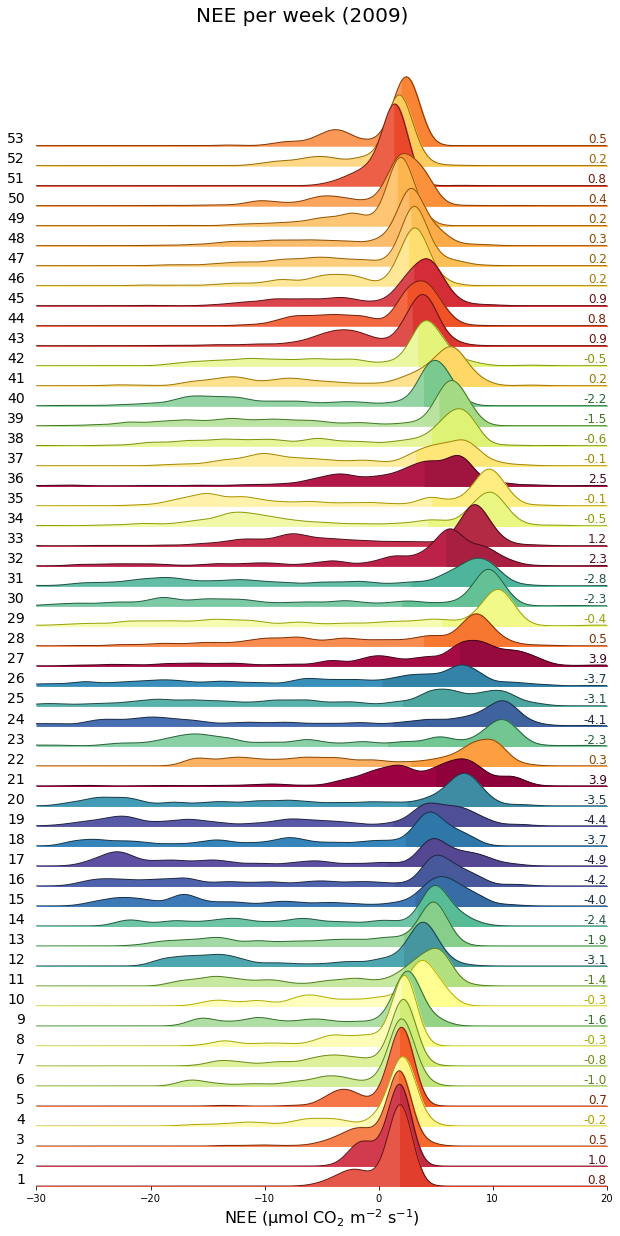

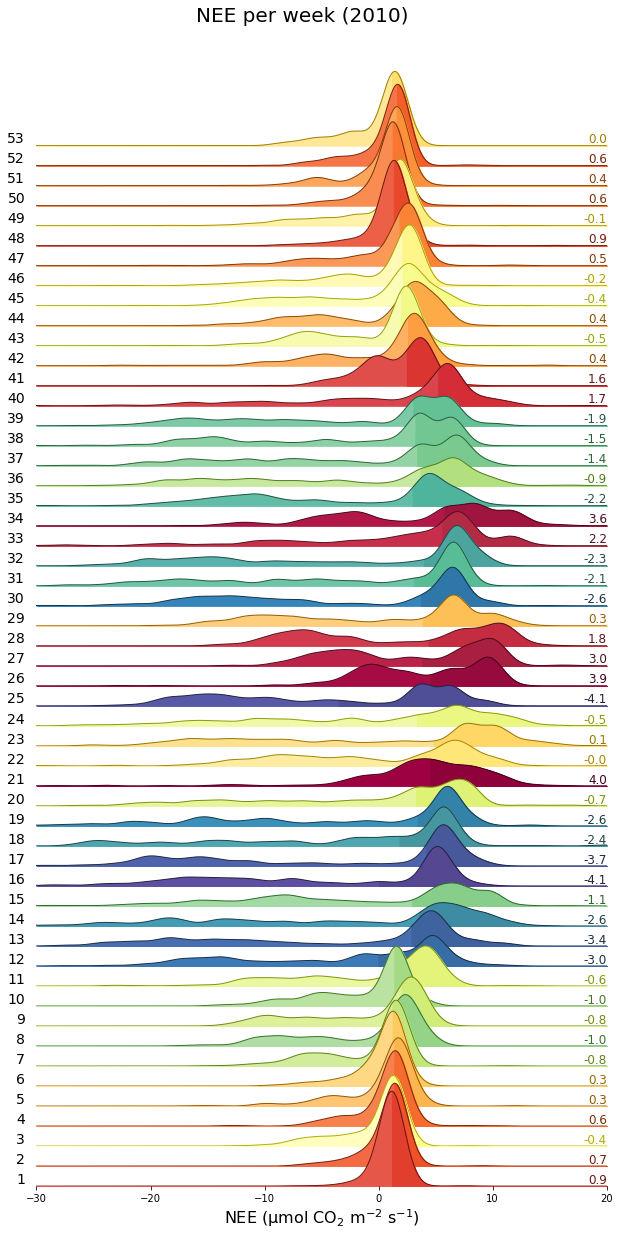

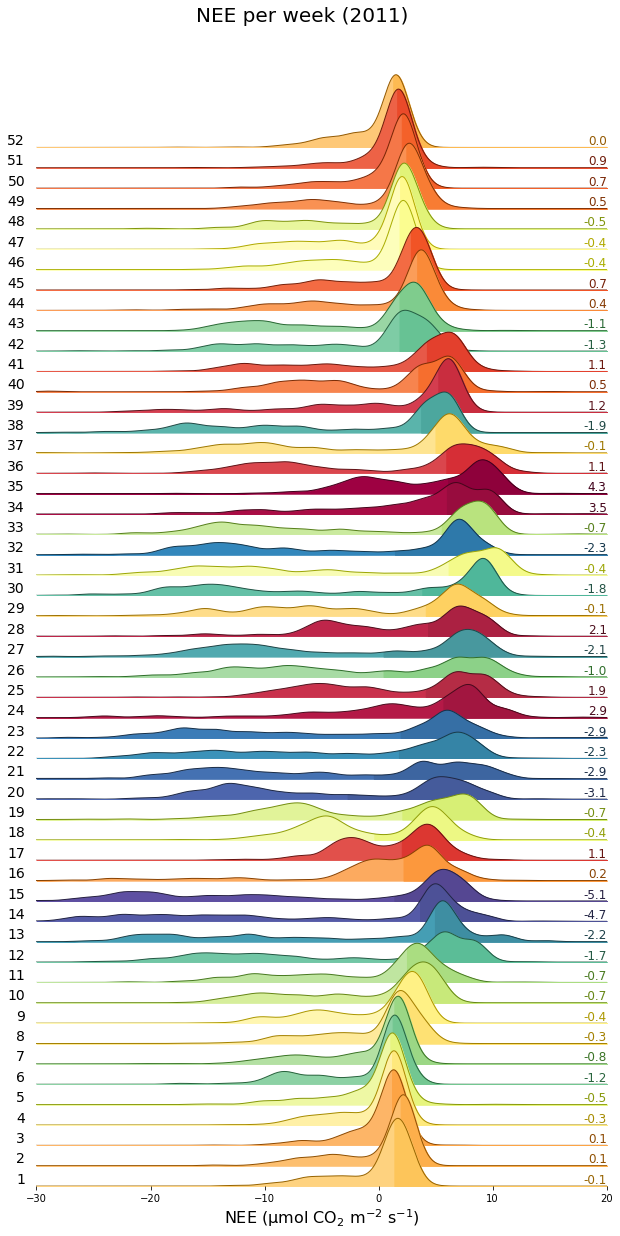

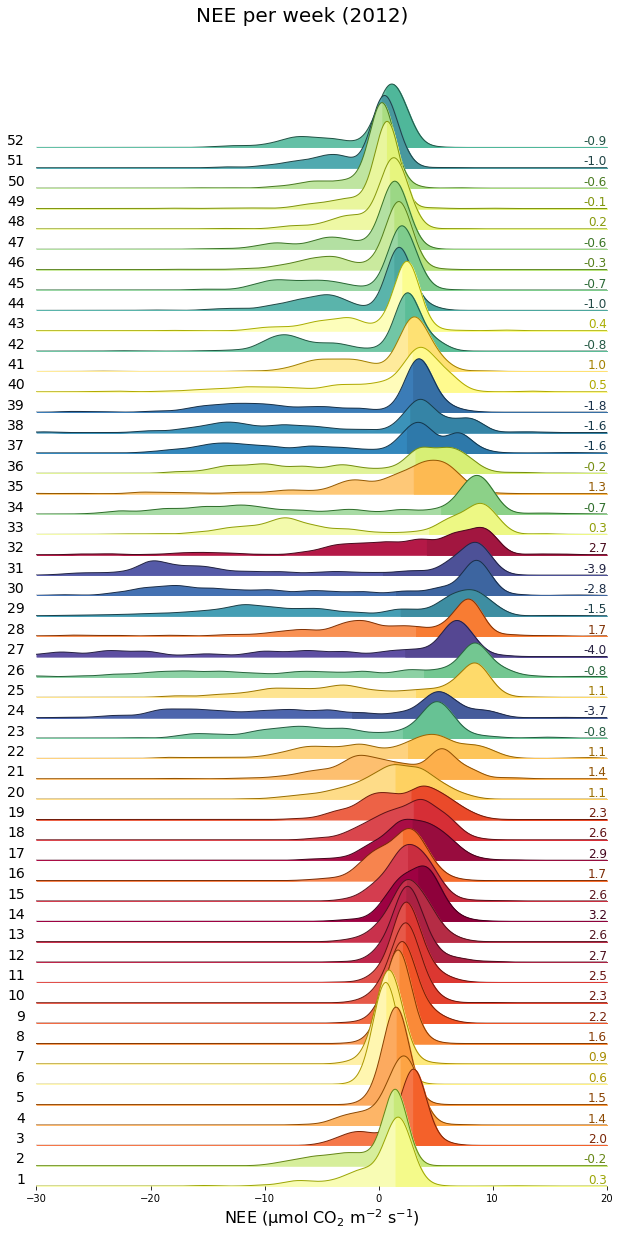

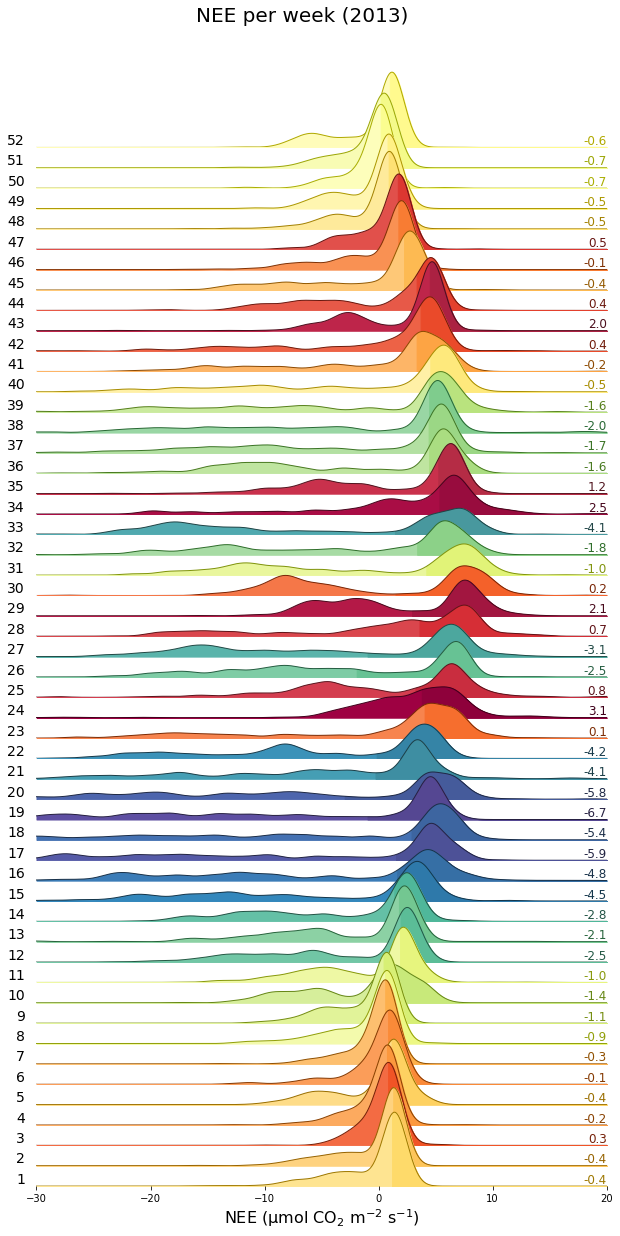

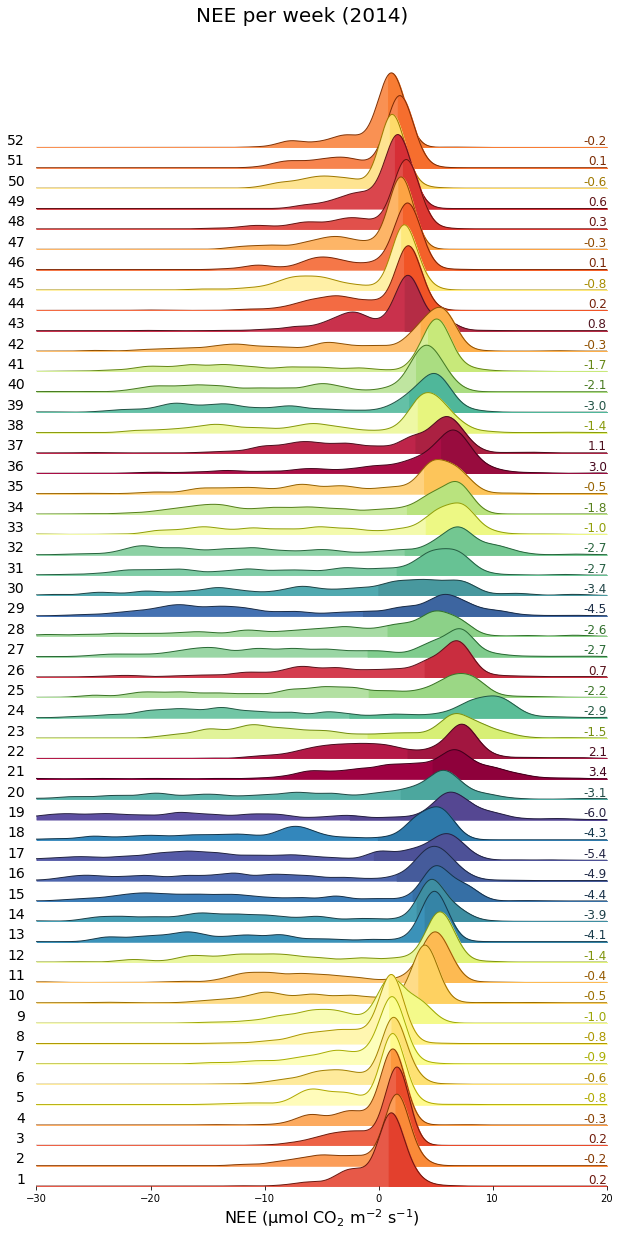

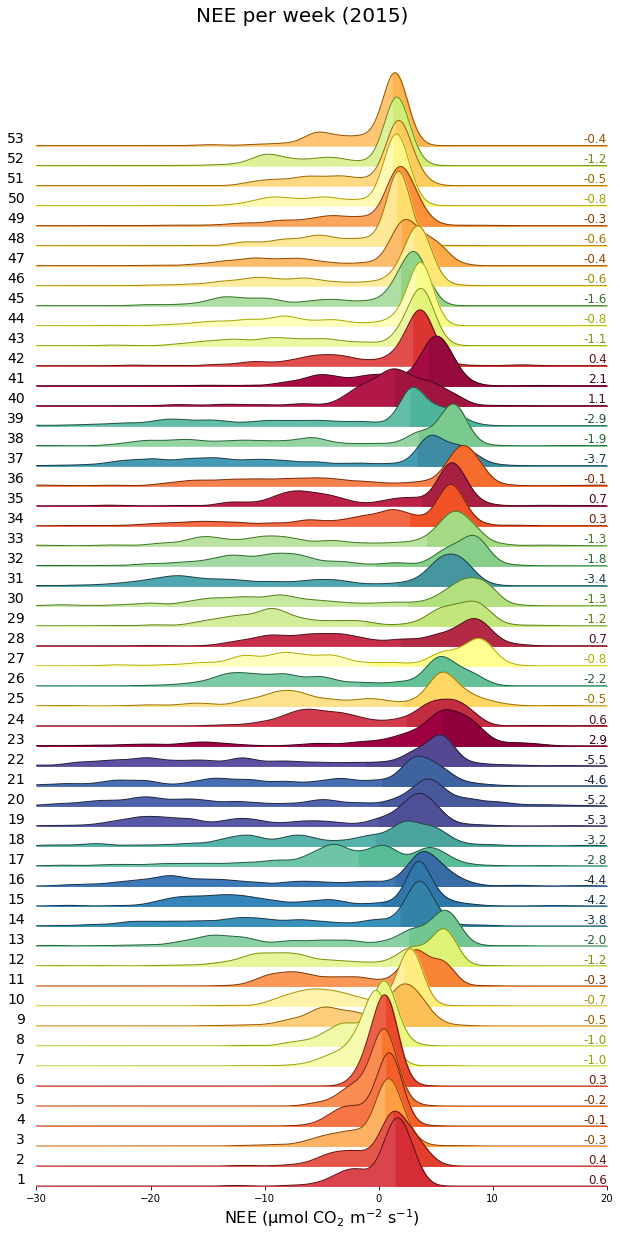

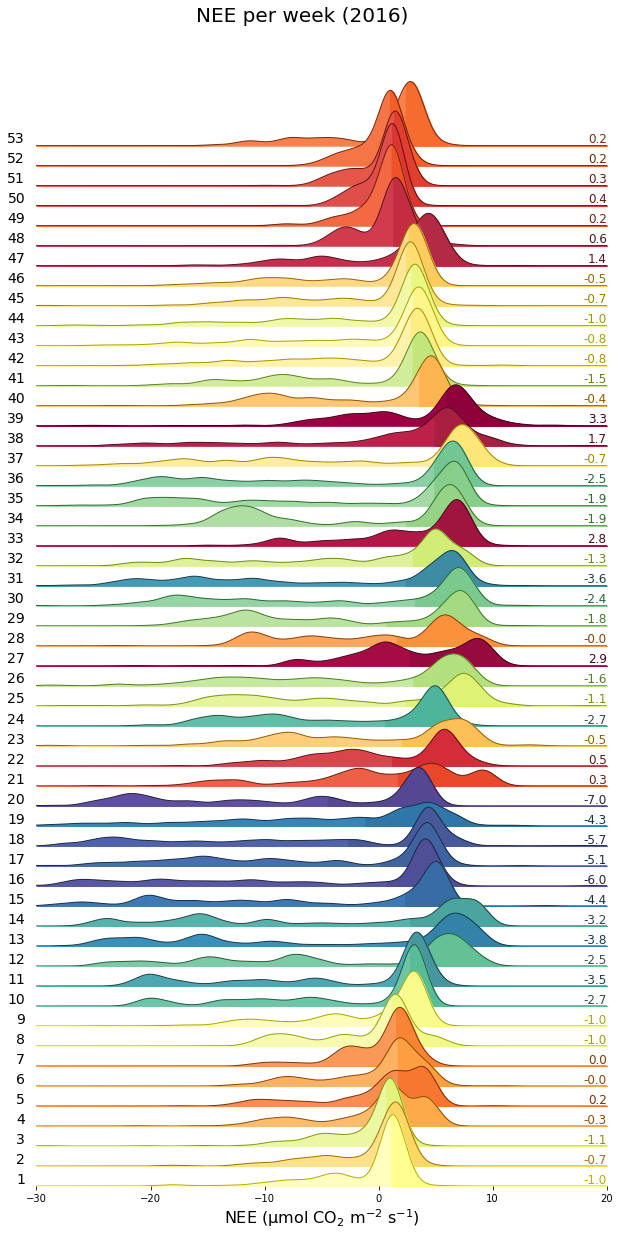

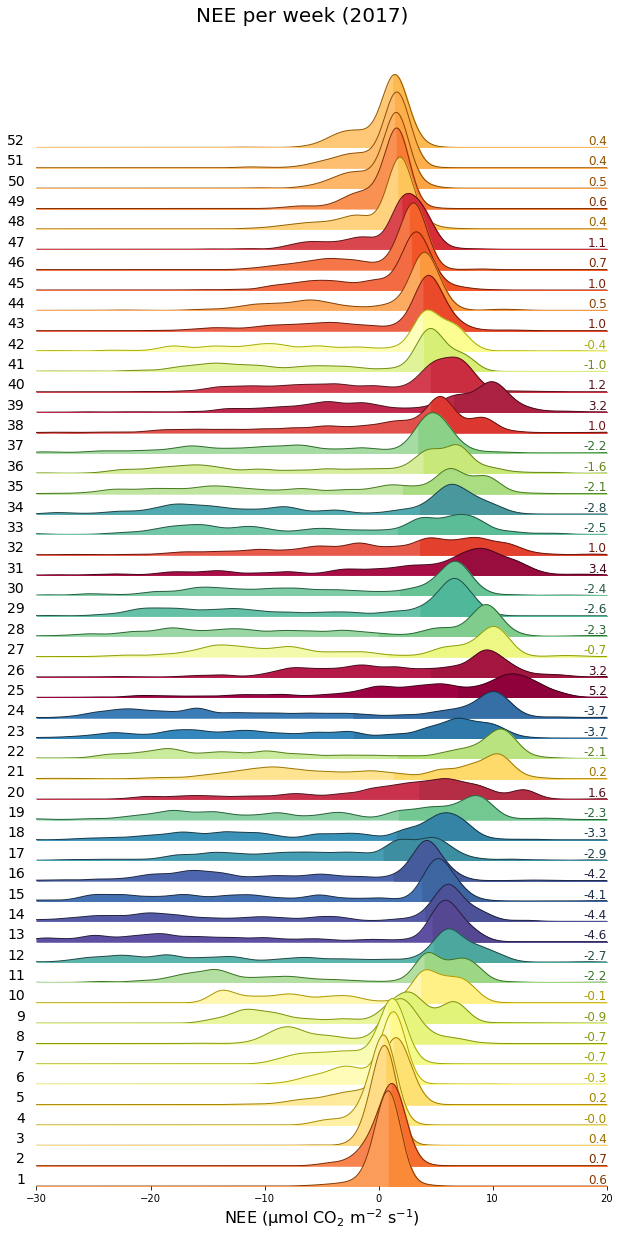

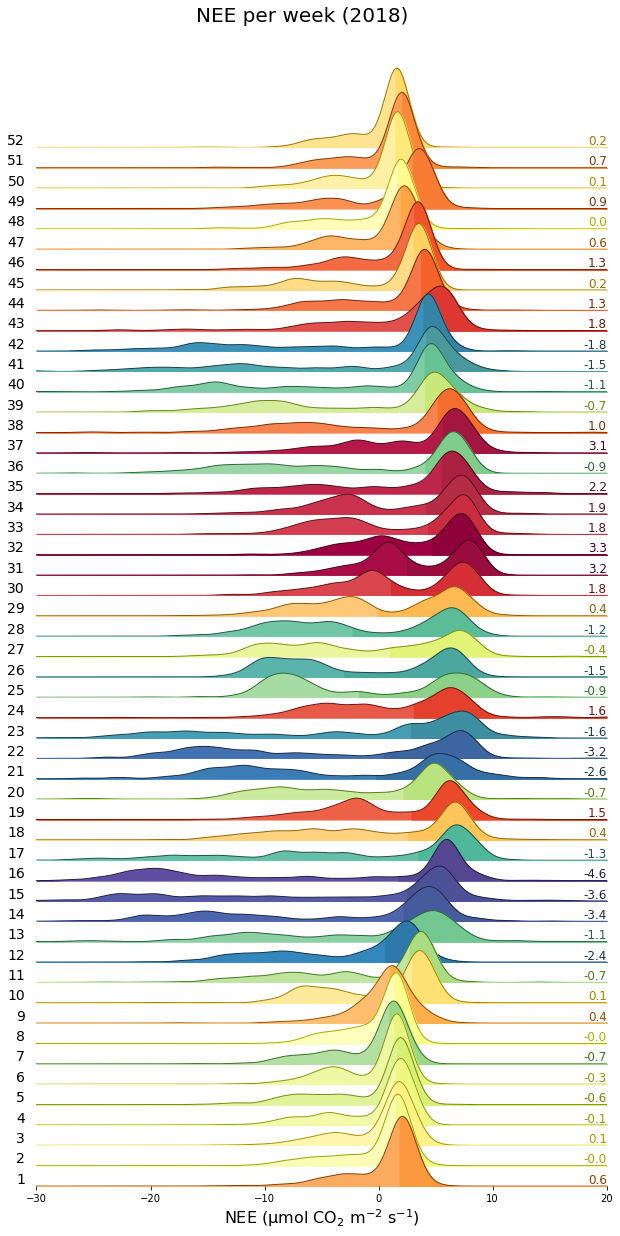

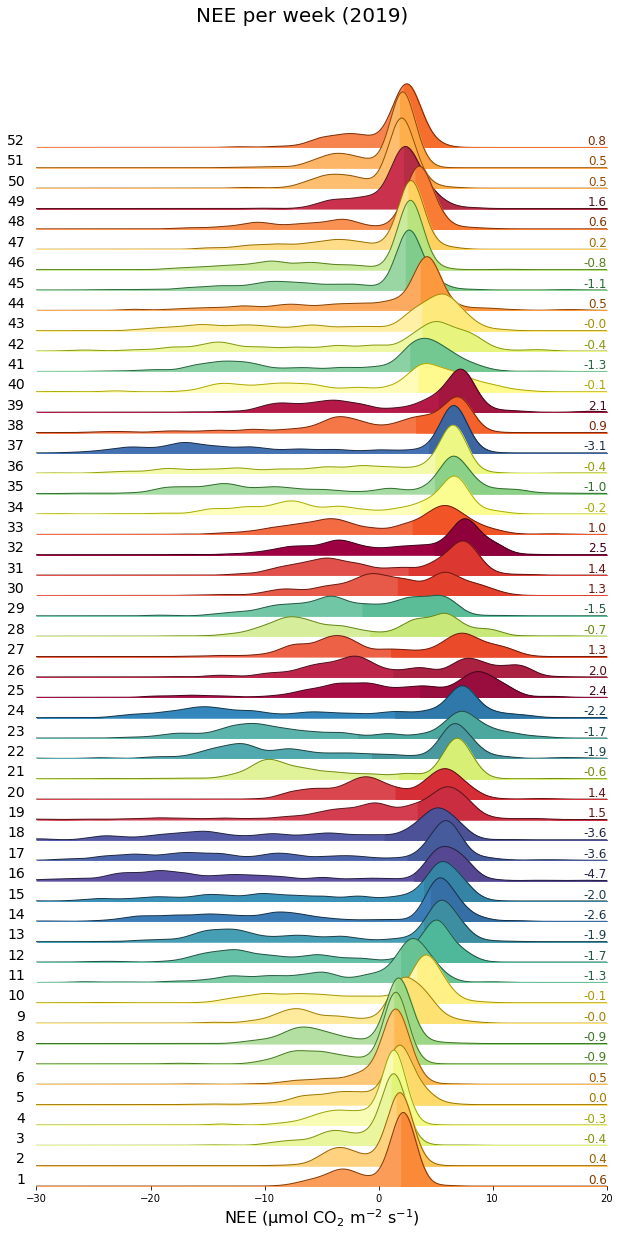

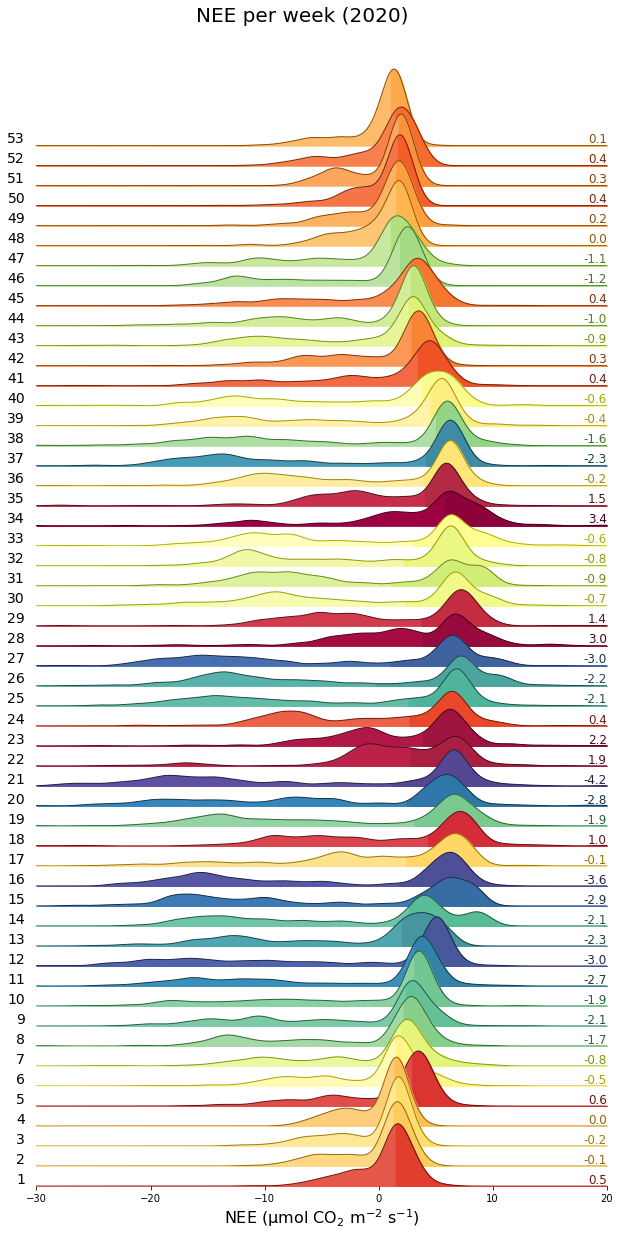

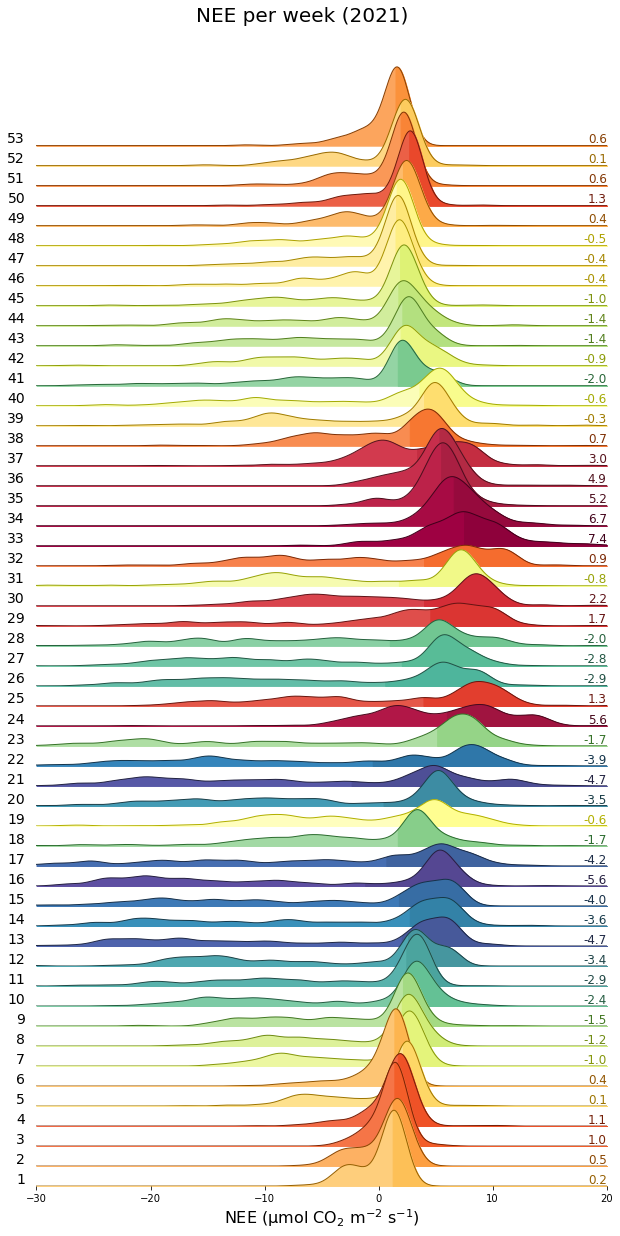

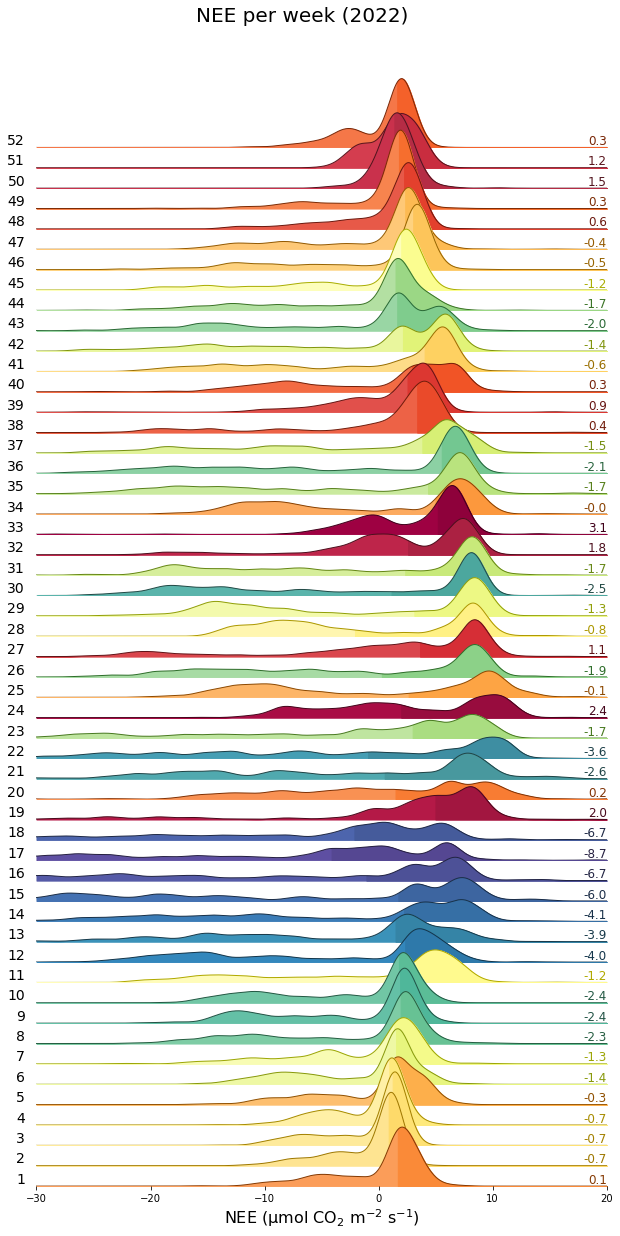

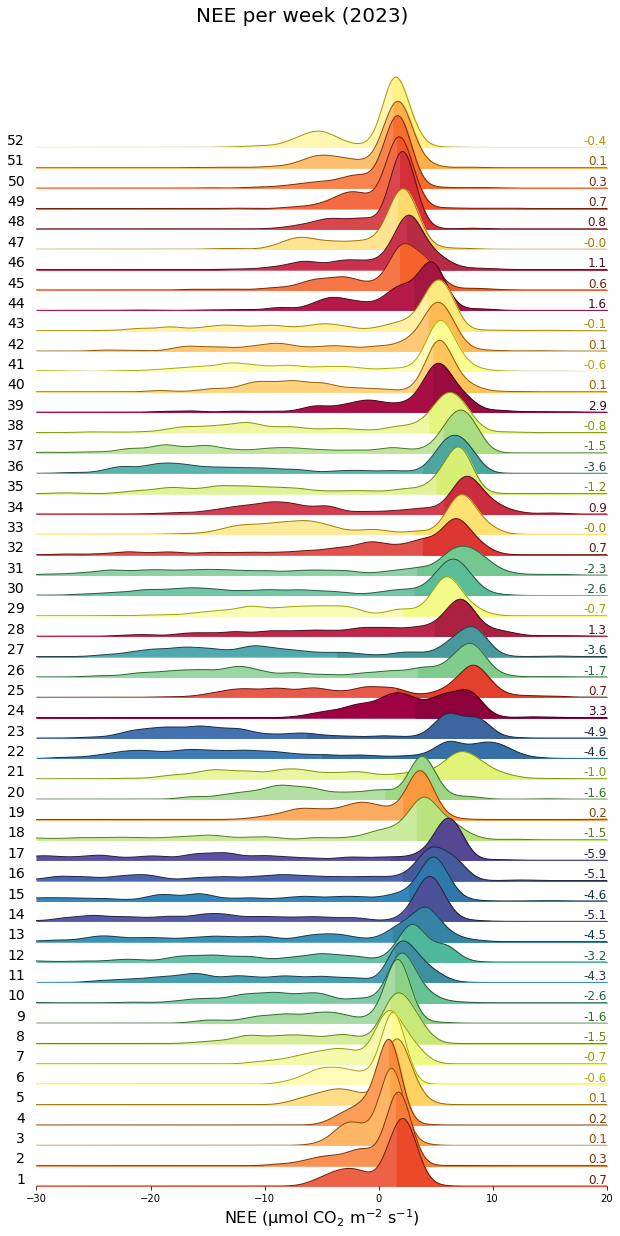

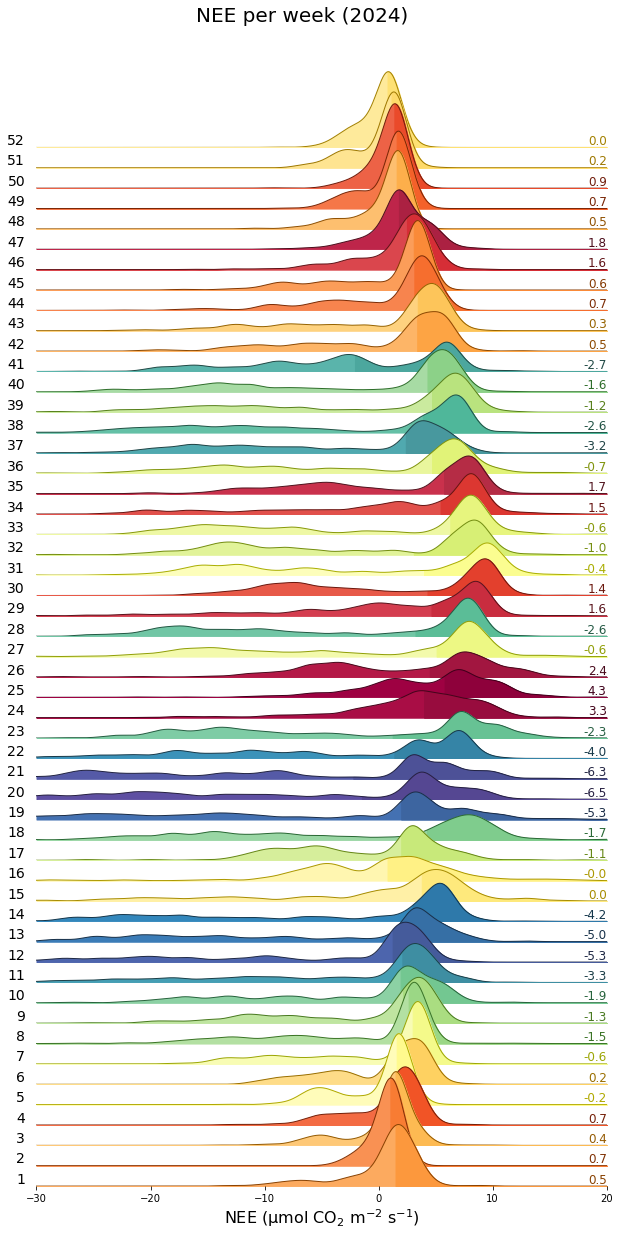

In [9]:
uniq_years = series.index.year.unique()
for uy in uniq_years:
    series_yr = series.loc[series.index.year == uy].copy()
    rp = dv.ridgeline(series=series_yr)
    rp.plot(
        how='weekly',
        kd_kwargs=None,  # params from scikit KernelDensity as dict
        xlim=[-30, 20],  # min/max as list
        ylim=[0, 0.35],  # min/max as list
        hspace=-0.8,  # overlap
        xlabel=f"{var} ({units})",
        fig_width=9,
        fig_height=18,
        shade_percentile=0.5,
        show_mean_line=False,
        fig_title=f"{var} per week ({uy})",
        fig_dpi=72,
        showplot=True,
        ascending=False
    )

# End of notebook

In [10]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished. {dt_string}")

Finished. 2025-05-14 13:06:58
